# The Weather Dataset
### The Weather Dataset is a time-series dataset with per hour information about the weather condition at a particular location. it records Temperature, Dew point temperature, Relative Humidity, Wind speed, visibility, pressure and conditions.




In [150]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
import calendar


#load the dataset 

weather = pd.read_csv('Weather_Data_Analysis.csv')

# Data Exploration and Cleaning

In [151]:
# Show the first 5 rows of the dataset to know what we are working with
print(weather.head())


       Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  1/1/2012 0:00    -1.8              -3.9         86                4   
1  1/1/2012 1:00    -1.8              -3.7         87                4   
2  1/1/2012 2:00    -1.8              -3.4         89                7   
3  1/1/2012 3:00    -1.5              -3.2         88                6   
4  1/1/2012 4:00    -1.5              -3.3         88                7   

   Visibility_km  Press_kPa               Weather  
0            8.0     101.24                   Fog  
1            8.0     101.24                   Fog  
2            4.0     101.26  Freezing Drizzle,Fog  
3            4.0     101.27  Freezing Drizzle,Fog  
4            4.8     101.23                   Fog  


In [152]:
# To show the total number of rows and columns in the dataset
shape = weather.shape

print(f"The weather data set has {shape[0]} rows and {shape[1]} columns")


The weather data set has 8784 rows and 8 columns


In [153]:
# To display the index of the dataset
index = weather.index

print(f"The index range is {index} ")



The index range is RangeIndex(start=0, stop=8784, step=1) 


In [154]:
# To display the column names 
print(f"The dataset column names are {weather.columns}")

The dataset column names are Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')


In [155]:
# Most of the column names are not appropriate, so they will be renamed
weather.columns = ['Date_Time','Temp_cels','Dew_point_temp_c', 'Rel_Humidity_perc','Wind_speed_kmperhr', 'Visibility_km', 'Pressure_kPa','Weather_condition']

print(f"The dataset column names have now been modified to {weather.columns}")

The dataset column names have now been modified to Index(['Date_Time', 'Temp_cels', 'Dew_point_temp_c', 'Rel_Humidity_perc',
       'Wind_speed_kmperhr', 'Visibility_km', 'Pressure_kPa',
       'Weather_condition'],
      dtype='object')


In [156]:
# To get the decription about numeric data
weather.describe()

,Temp_cels,Dew_point_temp_c,Rel_Humidity_perc,Wind_speed_kmperhr,Visibility_km,Pressure_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [157]:
# To display the datatype of each column
weather.dtypes

Date_Time              object
Temp_cels             float64
Dew_point_temp_c      float64
Rel_Humidity_perc       int64
Wind_speed_kmperhr      int64
Visibility_km         float64
Pressure_kPa          float64
Weather_condition      object
dtype: object

In [158]:
# Convert the Date_time column to datetime datatypes
weather['Date_Time'] = pd.to_datetime(weather['Date_Time'])

weather.dtypes

Date_Time             datetime64[ns]
Temp_cels                    float64
Dew_point_temp_c             float64
Rel_Humidity_perc              int64
Wind_speed_kmperhr             int64
Visibility_km                float64
Pressure_kPa                 float64
Weather_condition             object
dtype: object

In [159]:
# To get the number of unique values in the dataframe
weather.nunique()

Date_Time             8784
Temp_cels              533
Dew_point_temp_c       489
Rel_Humidity_perc       83
Wind_speed_kmperhr      34
Visibility_km           24
Pressure_kPa           518
Weather_condition       50
dtype: int64

In [160]:
# To check for missing values in the dataframe
print(weather.isna().sum())

print("The data set has no null values")

Date_Time             0
Temp_cels             0
Dew_point_temp_c      0
Rel_Humidity_perc     0
Wind_speed_kmperhr    0
Visibility_km         0
Pressure_kPa          0
Weather_condition     0
dtype: int64
The data set has no null values


In [161]:
# To display the basic information on the dataframe
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date_Time           8784 non-null   datetime64[ns]
 1   Temp_cels           8784 non-null   float64       
 2   Dew_point_temp_c    8784 non-null   float64       
 3   Rel_Humidity_perc   8784 non-null   int64         
 4   Wind_speed_kmperhr  8784 non-null   int64         
 5   Visibility_km       8784 non-null   float64       
 6   Pressure_kPa        8784 non-null   float64       
 7   Weather_condition   8784 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 549.1+ KB


In [162]:
# Because each value of the Datetime column is unique and we may want to analyse based on the date only or the time only.
# A new column will be created for each

weather['Date'] = weather['Date_Time'].dt.date
weather['Time'] = weather['Date_Time'].dt.time
weather['Month'] = weather['Date_Time'].dt.month

weather['Month'] = weather['Month'].apply(lambda x: calendar.month_name[x]) # to convert the month to January, february etc format

weather.head()

,Date_Time,Temp_cels,Dew_point_temp_c,Rel_Humidity_perc,Wind_speed_kmperhr,Visibility_km,Pressure_kPa,Weather_condition,Date,Time,Month
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,2012-01-01,00:00:00,January
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,2012-01-01,01:00:00,January
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",2012-01-01,02:00:00,January
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",2012-01-01,03:00:00,January
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,2012-01-01,04:00:00,January


In [163]:
# To get the unique values of the 'weather_condition' 
weather['Weather_condition'].value_counts()


Weather_condition
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle      

##### Find all the unique windspeed value

In [164]:
# To get all the unique windspeed values

print(f" The windspeed column has {weather['Wind_speed_kmperhr'].nunique()} unique values")
print(f" The unique values are {weather['Wind_speed_kmperhr'].unique()}")

 The windspeed column has 34 unique values
 The unique values are [ 4  7  6  9 15 13 20 22 19 24 30 35 39 32 33 26 44 43 48 37 28 17 11  0
 83 70 57 46 41 52 50 63 54  2]


#### Find the number of times when the 'Weather is exactly clear'

In [165]:
# To get every instance when weather was clear

Clear_weather = weather[weather['Weather_condition'] == 'Clear']
print(Clear_weather)
print(f" The weather was clear in  {Clear_weather['Weather_condition'].count()/ len(weather)* 100} percent of the time recorded")

               Date_Time  Temp_cels  Dew_point_temp_c  Rel_Humidity_perc  \
67   2012-01-03 19:00:00      -16.9             -24.8                 50   
114  2012-01-05 18:00:00       -7.1             -14.4                 56   
115  2012-01-05 19:00:00       -9.2             -15.4                 61   
116  2012-01-05 20:00:00       -9.8             -15.7                 62   
117  2012-01-05 21:00:00       -9.0             -14.8                 63   
...                  ...        ...               ...                ...   
8646 2012-12-26 06:00:00      -13.4             -14.8                 89   
8698 2012-12-28 10:00:00       -6.1              -8.6                 82   
8713 2012-12-29 01:00:00      -11.9             -13.6                 87   
8714 2012-12-29 02:00:00      -11.8             -13.1                 90   
8756 2012-12-30 20:00:00      -13.8             -16.5                 80   

      Wind_speed_kmperhr  Visibility_km  Pressure_kPa Weather_condition  \
67          

#### Find all instances when the 'Wind Speed was exactly 7 km/hr'

In [166]:
# To get all instances when the 'Wind Speed was exactly 7 km/hr' 

weather[weather['Wind_speed_kmperhr'] == 7]


,Date_Time,Temp_cels,Dew_point_temp_c,Rel_Humidity_perc,Wind_speed_kmperhr,Visibility_km,Pressure_kPa,Weather_condition,Date,Time,Month
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",2012-01-01,02:00:00,January
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,2012-01-01,04:00:00,January
6,2012-01-01 06:00:00,-1.5,-3.1,89,7,6.4,101.29,Fog,2012-01-01,06:00:00,January
7,2012-01-01 07:00:00,-1.4,-3.6,85,7,8.0,101.26,Fog,2012-01-01,07:00:00,January
11,2012-01-01 11:00:00,-0.5,-2.1,89,7,4.0,100.98,Fog,2012-01-01,11:00:00,January
...,...,...,...,...,...,...,...,...,...,...,...
8647,2012-12-26 07:00:00,-13.0,-14.4,89,7,25.0,102.46,Mainly Clear,2012-12-26,07:00:00,December
8693,2012-12-28 05:00:00,-5.0,-6.1,92,7,25.0,101.01,Cloudy,2012-12-28,05:00:00,December
8719,2012-12-29 07:00:00,-14.8,-16.4,88,7,8.0,101.22,Fog,2012-12-29,07:00:00,December
8722,2012-12-29 10:00:00,-12.0,-13.3,90,7,6.4,101.15,Fog,2012-12-29,10:00:00,December


#### Find the minimum date and the maximum date recorded

In [167]:
print(f"The dataset recorded the hourly weather information from {weather['Date_Time'].min()} to {weather['Date_Time'].max()}")


The dataset recorded the hourly weather information from 2012-01-01 00:00:00 to 2012-12-31 23:00:00


#### Explore the correlation, relationships between the numerical columns

In [168]:
num_weather = weather.select_dtypes('number')
num_weather.corr()

,Temp_cels,Dew_point_temp_c,Rel_Humidity_perc,Wind_speed_kmperhr,Visibility_km,Pressure_kPa
Temp_cels,1.000000,0.932714,-0.220182,-0.061876,0.273455,-0.236389
Dew_point_temp_c,0.932714,1.000000,0.139494,-0.095685,0.050813,-0.320616
Rel_Humidity_perc,-0.220182,0.139494,1.000000,-0.092743,-0.633683,-0.231424
Wind_speed_kmperhr,-0.061876,-0.095685,-0.092743,1.000000,0.004883,-0.356613
Visibility_km,0.273455,0.050813,-0.633683,0.004883,1.000000,0.231847
Pressure_kPa,-0.236389,-0.320616,-0.231424,-0.356613,0.231847,1.000000


<Axes: >

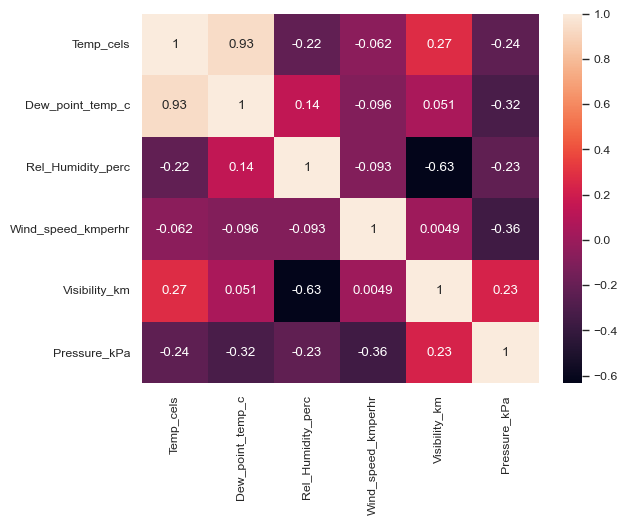

In [169]:
sns.heatmap(num_weather.corr(),annot = True)

We can observe that the Temperature and Dew point temperature have a very strong positive relationship,and that Visibility and Relative humidity are negatively related.
We can now explore this relationships.

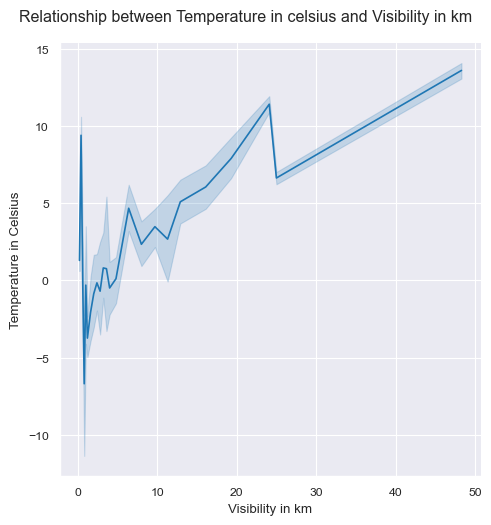

In [182]:
plott= sns.relplot(x='Visibility_km', y='Temp_cels', data =weather, kind='line')

plott.fig.suptitle("Relationship between Temperature in celsius and Visibility in km", y=1.04) # To add title to the plot
plott.set(xlabel="Visibility in km", ylabel="Temperature in Celsius" ) # To add labels to the x and y axes of the plot

plt.show()

#### Visualise the relationship between Relative Humidity in percent and Visibility in km


 A value -0.6336831841537367 indicates that Relative Humidity and Visibility are strongly inversely related.
Which signifies that as humidity increases, visibility decreases 


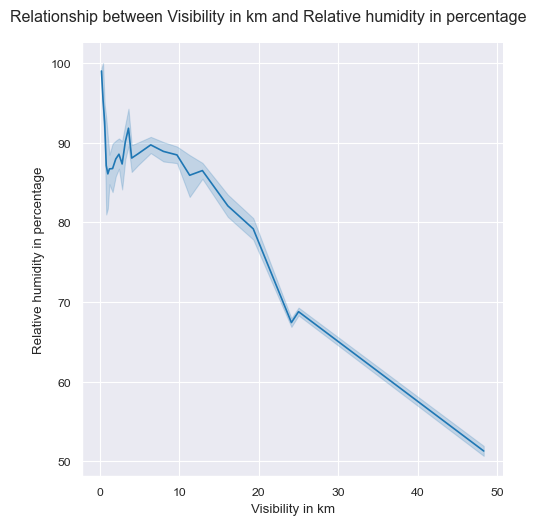

In [181]:
print(f""" A value { weather['Rel_Humidity_perc'].corr(weather['Visibility_km'])} indicates that Relative Humidity and Visibility are strongly inversely related.
Which signifies that as humidity increases, visibility decreases """)

plots=sns.relplot(x = 'Visibility_km', y= 'Rel_Humidity_perc',data=weather , kind ='line')
plots.fig.suptitle("Relationship between Visibility in km and Relative humidity in percentage", y=1.04) # To add title to the plot
plots.set(xlabel="Visibility in km", ylabel="Relative humidity in percentage" ) # To add labels to the x and y axes of the plot

plt.show()


#### Visualise the  relationship between Temperature and Dew Point Temperature in Celsius

The correlation between Temperature and Dew Point Temperature in Celsius is 0.9327141498173764


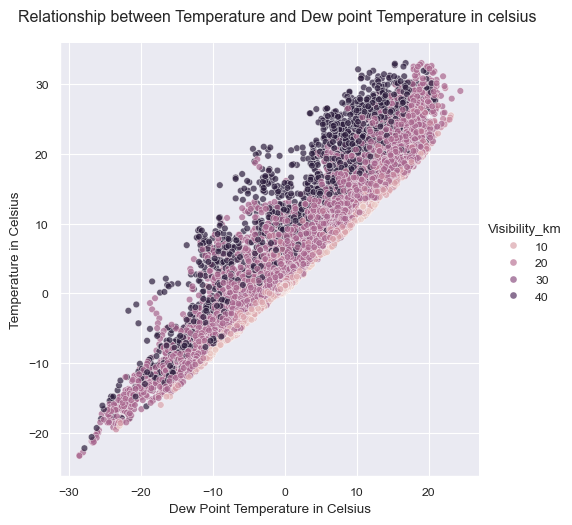

In [172]:
temp_dewtemp_corr = weather["Temp_cels"].corr(weather["Dew_point_temp_c"])
print(f"The correlation between Temperature and Dew Point Temperature in Celsius is {temp_dewtemp_corr}")
sns.set_style("darkgrid")
plot1= sns.relplot(x = 'Dew_point_temp_c', y=  'Temp_cels' ,data=weather , kind ='scatter', hue = 'Visibility_km', alpha = 0.7)

plot1.fig.suptitle("Relationship between Temperature and Dew point Temperature in celsius", y=1.04) # To add title to the plot
plot1.set(xlabel="Dew Point Temperature in Celsius", ylabel="Temperature in Celsius" ) # To add labels to the x and y axes of the plot

plt.show()


#### To get the seasonal change in Visibility

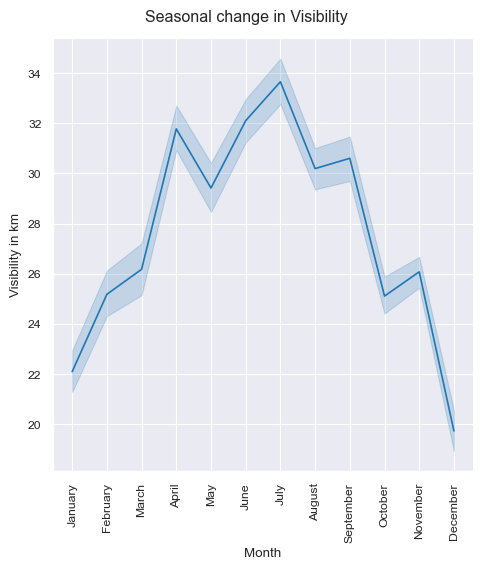

Month
January      22.100269
February     25.182184
March        26.177957
April        31.777083
May          29.418548
June         32.104167
July         33.655108
August       30.192608
September    30.603472
October      25.111022
November     26.077083
December     19.733199
Name: Visibility_km, dtype: float64


In [173]:
# The change in visibility over the course of months
#weather.head() #To take a peak at our data

plot1 = sns.relplot(x='Month', y='Visibility_km', data=weather, kind='line')


plot1.fig.suptitle("Seasonal change in Visibility",y=1.03) # To add title to the plot
plot1.set(xlabel="Month", ylabel="Visibility in km" ) # To add labels to the x and y axes of the plot

plt.xticks(rotation=90)   # for rotating x-axis labels
plt.show()

month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

sorted_month = weather 
sorted_month ['Month'] = pd.Categorical(weather['Month'], categories=month_order, ordered=True)
# get the average visibility by month

avg_vis_month = sorted_month.groupby('Month',observed= False)['Visibility_km'].mean()

print(avg_vis_month.sort_index())

#date_year = weather['Date_Time'].dt.year
#print(date_year)

Visibility was at it's highest in the months of Summer, it fell in Autumn and rose through Winter and Spring

#### Visualize the frequency of each weather condition

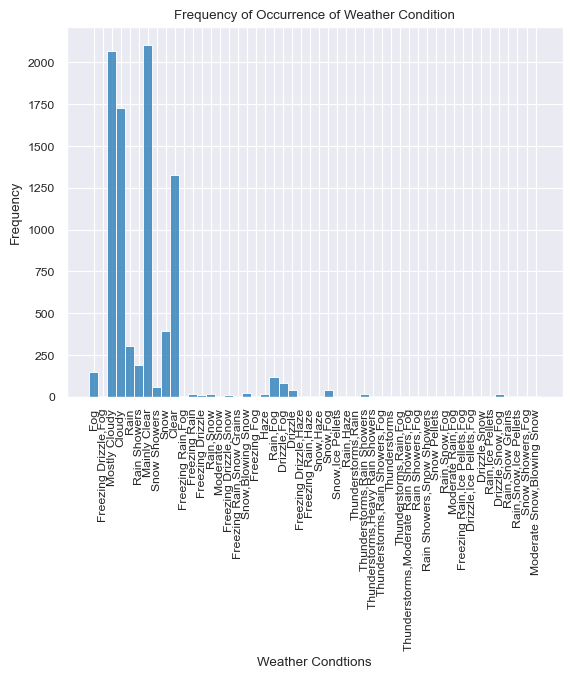

In [174]:
sns.set_context("paper") # To set the context of our plot

plot2 = sns.histplot(x="Weather_condition", data=weather)

plot2.set_title("Frequency of Occurrence of Weather Condition") # To add title to the plot
plot2.set(xlabel="Weather Condtions", ylabel="Frequency" ) # To add labels to the x and y axes of the plot

plt.xticks(rotation=90)  # for rotating x-axis labels
plt.show()


# however the graph looks very compact, because of the several weather conditions

#### Categorising the 'Weather_condition' column allows for better analysis and visualisation

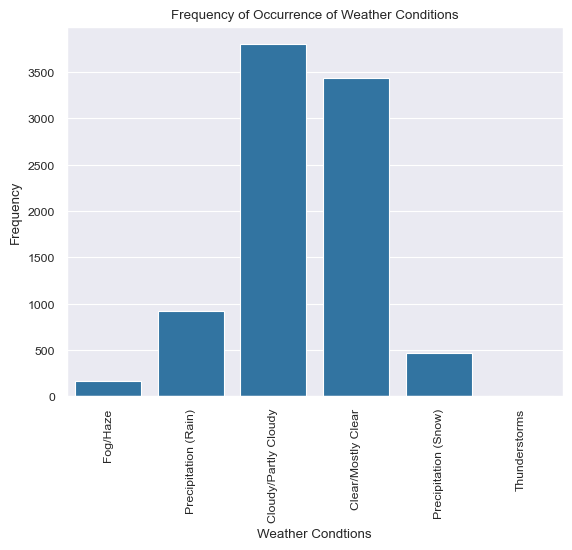

In [175]:

Weather_categories = ["Clear/Mostly Clear","Cloudy/Partly Cloudy","Precipitation (Rain)","Precipitation (Snow)","Fog/Haze", "Thunderstorms"]

Mostly_clear = "Clear|Mainly Clear"
Cloudy = "Cloudy" 
Rainy = "Rain|Showers|Drizzle"
Snowy = "Snow"
Fog_haze = "Fog|Haze"
Thunderstorm = "Thunderstorms"

Conditions = [weather['Weather_condition'].str.contains(Mostly_clear),
             weather['Weather_condition'].str.contains(Cloudy),
             weather['Weather_condition'].str.contains(Rainy),
             weather['Weather_condition'].str.contains(Snowy),
             weather['Weather_condition'].str.contains(Fog_haze),
             weather['Weather_condition'].str.contains(Thunderstorm)
             ]

weather["Weather_category"] = np.select(Conditions, Weather_categories, default = "Other")

# visualize the 'Weather_category' frequency
plot3 =sns.countplot(data= weather, x='Weather_category')

plot3.set_title("Frequency of Occurrence of Weather Conditions") # To add title to the plot
plot3.set(xlabel="Weather Condtions", ylabel="Frequency" ) # To add labels to the x and y axes of the plot

plt.xticks(rotation=90)  # for rotating x-axis labels
plt.show()

#### Visualising the frequency of weather conditions by month

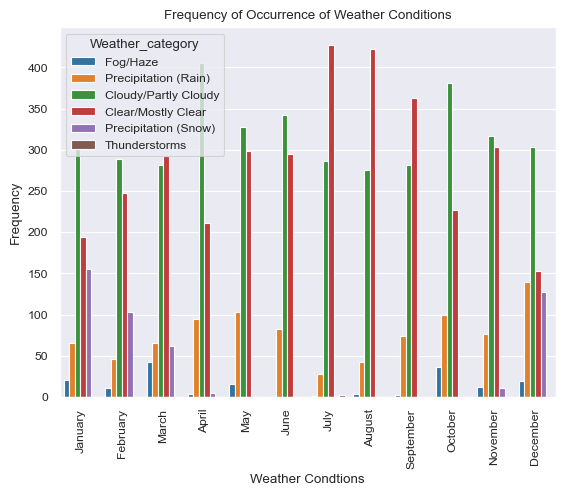

In [176]:
plot4= sns.countplot(x='Month', hue='Weather_category', data= weather)

plot4.set_title("Frequency of Occurrence of Weather Conditions") # To add title to the plot
plot4.set(xlabel="Weather Condtions", ylabel="Frequency" ) # To add labels to the x and y axes of the plot

plt.xticks(rotation=90)  # for rotating x-axis labels
plt.show()

In [177]:
# Find all instances when snow was recorded

weather[weather['Weather_condition'].str.contains('Snow')]

,Date_Time,Temp_cels,Dew_point_temp_c,Rel_Humidity_perc,Wind_speed_kmperhr,Visibility_km,Pressure_kPa,Weather_condition,Date,Time,Month,Weather_category
41,2012-01-02 17:00:00,-2.1,-9.5,57,22,25.0,99.66,Snow Showers,2012-01-02,17:00:00,January,Precipitation (Rain)
44,2012-01-02 20:00:00,-5.6,-13.4,54,24,25.0,100.07,Snow Showers,2012-01-02,20:00:00,January,Precipitation (Rain)
45,2012-01-02 21:00:00,-5.8,-12.8,58,26,25.0,100.15,Snow Showers,2012-01-02,21:00:00,January,Precipitation (Rain)
47,2012-01-02 23:00:00,-7.4,-14.1,59,17,19.3,100.27,Snow Showers,2012-01-02,23:00:00,January,Precipitation (Rain)
48,2012-01-03 00:00:00,-9.0,-16.0,57,28,25.0,100.35,Snow Showers,2012-01-03,00:00:00,January,Precipitation (Rain)
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow,2012-12-31,19:00:00,December,Precipitation (Snow)
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow,2012-12-31,20:00:00,December,Precipitation (Snow)
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow,2012-12-31,21:00:00,December,Precipitation (Snow)
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow,2012-12-31,22:00:00,December,Precipitation (Snow)


 #### Find mean value of each column for  each 'Weather category'

In [178]:
weathers_dropped = weather.drop(['Date_Time','Date','Time','Month','Weather_condition'],axis=1)

weathers_dropped_grouped = weathers_dropped.groupby('Weather_category').mean()
weathers_dropped_grouped.head()

,Temp_cels,Dew_point_temp_c,Rel_Humidity_perc,Wind_speed_kmperhr,Visibility_km,Pressure_kPa
Weather_category,,,,,,
Clear/Mostly Clear,10.343823,2.846008,62.147145,12.758741,32.676282,101.379659
Cloudy/Partly Cloudy,9.389334,2.787411,65.511193,15.956545,29.147617,100.973476
Fog/Haze,3.600000,2.290000,91.176471,8.105882,6.265294,101.238882
Precipitation (Rain),8.258977,5.575299,84.022851,17.385201,15.663330,100.388487
Precipitation (Snow),-4.566164,-7.452802,80.633621,20.551724,10.080172,100.513125


#### Get all instances where weather category is precipitation(Rain and Relative humidity is greater than 50 and Visibility is less than 40

In [179]:
weather[((weather['Weather_category']=='Precipitation (Rain)')& (weather['Rel_Humidity_perc']>50)) &(weather['Visibility_km']<40)]

,Date_Time,Temp_cels,Dew_point_temp_c,Rel_Humidity_perc,Wind_speed_kmperhr,Visibility_km,Pressure_kPa,Weather_condition,Date,Time,Month,Weather_category
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",2012-01-01,02:00:00,January,Precipitation (Rain)
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",2012-01-01,03:00:00,January,Precipitation (Rain)
18,2012-01-01 18:00:00,3.8,1.0,82,15,12.9,99.74,Rain,2012-01-01,18:00:00,January,Precipitation (Rain)
19,2012-01-01 19:00:00,3.1,1.3,88,15,12.9,99.68,Rain,2012-01-01,19:00:00,January,Precipitation (Rain)
22,2012-01-01 22:00:00,4.4,1.9,84,24,19.3,99.32,Rain Showers,2012-01-01,22:00:00,January,Precipitation (Rain)
...,...,...,...,...,...,...,...,...,...,...,...,...
8723,2012-12-29 11:00:00,-10.9,-12.2,90,7,6.4,101.09,"Snow Showers,Fog",2012-12-29,11:00:00,December,Precipitation (Rain)
8724,2012-12-29 12:00:00,-10.5,-11.6,92,11,8.0,100.93,"Snow Showers,Fog",2012-12-29,12:00:00,December,Precipitation (Rain)
8725,2012-12-29 13:00:00,-10.0,-11.1,92,22,9.7,100.63,"Snow Showers,Fog",2012-12-29,13:00:00,December,Precipitation (Rain)
8767,2012-12-31 07:00:00,-9.3,-11.3,85,0,19.3,101.19,Snow Showers,2012-12-31,07:00:00,December,Precipitation (Rain)


#### Seasonal Changes in temperature

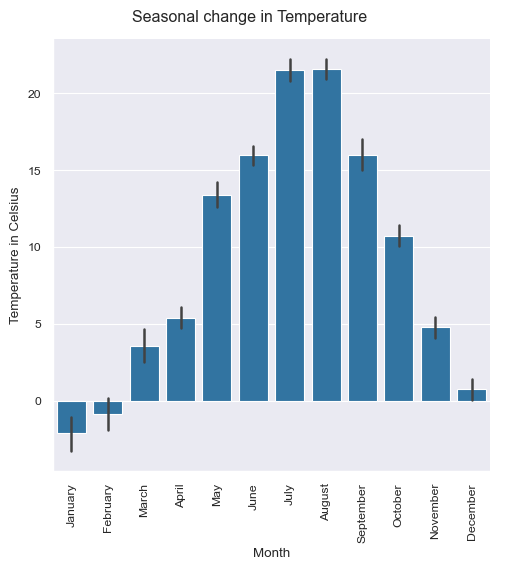

In [123]:
plot5 = sns.catplot(x="Month",y= "Temp_cels", data=weather_filtered,kind = "bar")

plot5.fig.suptitle("Seasonal change in Temperature",y=1.03) # To add title to the plot
plot5.set(xlabel="Month", ylabel="Temperature in Celsius" ) # To add labels to the x and y axes of the plot

plt.xticks(rotation=90)  # for rotating x-axis labels
plt.show()